In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [134]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [135]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [136]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886699 entries, 0 to 1886698
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 28.8 MB


In [137]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1886694    0.16
1886695    0.16
1886696    0.16
1886697    0.16
1886698    0.16
Name: kWh, Length: 1886699, dtype: float64

In [138]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1886694    0.16
1886695    0.16
1886696    0.16
1886697    0.16
1886698    0.16
Name: kWh, Length: 1886699, dtype: float64

In [139]:
l=len(conso_data)-1
l

1886698

In [140]:
conso_data['sec']=conso_data['Interval']/1000


In [141]:
conso_data['Wh']=3600000/conso_data['Interval']


In [142]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [143]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886699 entries, 0 to 1886698
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 72.0 MB


In [144]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1886694,21938,0.16,21.938,164.098824,46311597096
1886695,22189,0.16,22.189,162.242553,46311619285
1886696,22183,0.16,22.183,162.286436,46311641468
1886697,21826,0.16,21.826,164.940896,46311663294
1886698,22144,0.16,22.144,162.572254,46311685438


In [145]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

46311685438000

In [146]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 21, 5, 31, 597427)

In [147]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [148]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [149]:
base

datetime.datetime(2023, 8, 21, 21, 5, 31, 597427)

In [150]:
# create column 'dates' with time cumulated time from base
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['dates']

0         2023-08-21 21:05:53.531427
1         2023-08-21 21:06:15.389427
2         2023-08-21 21:06:37.390427
3         2023-08-21 21:06:59.318427
4         2023-08-21 21:07:21.209427
                     ...            
1886694   2025-02-07 21:25:28.693427
1886695   2025-02-07 21:25:50.882427
1886696   2025-02-07 21:26:13.065427
1886697   2025-02-07 21:26:34.891427
1886698   2025-02-07 21:26:57.035427
Name: dates, Length: 1886699, dtype: datetime64[ns]

## créer les dates

In [151]:
# create column 'days' avec format 'dd/mm/yy'
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:05:53.531427,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:06:15.389427,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:06:37.390427,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:06:59.318427,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:07:21.209427,21/08/23
...,...,...,...,...,...,...,...
1886694,21938,0.16,21.938,164.098824,46311597096,2025-02-07 21:25:28.693427,07/02/25
1886695,22189,0.16,22.189,162.242553,46311619285,2025-02-07 21:25:50.882427,07/02/25
1886696,22183,0.16,22.183,162.286436,46311641468,2025-02-07 21:26:13.065427,07/02/25
1886697,21826,0.16,21.826,164.940896,46311663294,2025-02-07 21:26:34.891427,07/02/25


### save conso_data with dates

In [152]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [153]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('07/02/25', 7, 2, 2025)

In [154]:
here = now.strftime('%H:%M:%S')
here

'21:27:27'

In [155]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [156]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3519 entries, 1883180 to 1886698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3519 non-null   int64         
 1   kWh        3519 non-null   float64       
 2   sec        3519 non-null   float64       
 3   Wh         3519 non-null   float64       
 4   cumul(ms)  3519 non-null   int64         
 5   dates      3519 non-null   datetime64[ns]
 6   days       3519 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 219.9+ KB


In [157]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [158]:
data = list(df_grp['kWh'])
print(data)

[0.574, 3.702, 4.234, 3.678, 3.967, 4.599, 3.715, 3.458, 3.5, 3.707, 3.445, 4.117, 4.232, 3.665, 3.627, 3.638, 3.319, 3.374, 4.059, 4.049, 4.014, 4.091, 3.506, 4.257, 3.947, 3.749, 4.117, 4.629, 4.119, 3.214, 3.173, 3.874, 3.8, 3.087, 3.787, 4.158, 3.622, 3.721, 4.586, 4.292, 4.434, 3.896, 3.445, 4.265, 3.913, 3.79, 3.53, 3.944, 3.772, 3.449, 4.128, 3.386, 3.831, 3.884, 3.605, 3.746, 4.307, 3.257, 3.873, 3.153, 2.055, 2.042, 2.304, 4.081, 3.647, 4.307, 3.631, 3.985, 3.772, 3.695, 4.214, 3.97, 3.792, 3.123, 3.769, 3.588, 3.546, 3.713, 3.674, 3.338, 3.813, 3.258, 3.748, 3.607, 4.061, 3.565, 3.528, 3.679, 4.102, 4.344, 3.929, 4.147, 4.266, 3.819, 3.869, 3.839, 3.791, 3.816, 4.076, 4.409, 3.874, 3.506, 3.68, 3.672, 3.35, 3.833, 3.795, 4.309, 3.528, 4.159, 3.599, 3.901, 4.675, 3.598, 3.574, 3.525, 3.978, 3.844, 4.161, 3.843, 3.842, 3.623, 5.062, 3.763, 3.675, 4.277, 4.206, 4.372, 4.497, 4.144, 3.653, 4.464, 4.706, 4.114, 4.754, 4.48, 3.66, 4.053, 3.896, 3.615, 3.567, 3.956, 3.663, 3.723, 3.

In [159]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [160]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [161]:
df = conso_data
len(df)

1886699

In [162]:
period(p=2)

2023-08-22 03:12:07.334427	2023-08-22 10:16:22.954427	7h 4m 15s 	2000


In [163]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.299425
dtype: float64

In [164]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.513406
dtype: float64

In [165]:
last=df_grp.iloc[-1]['kWh']
last

3.519

In [166]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3519 entries, 1883180 to 1886698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3519 non-null   int64         
 1   kWh        3519 non-null   float64       
 2   sec        3519 non-null   float64       
 3   Wh         3519 non-null   float64       
 4   cumul(ms)  3519 non-null   int64         
 5   dates      3519 non-null   datetime64[ns]
 6   days       3519 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 219.9+ KB


In [167]:
# select day
day = today
#day = '16/08/24'


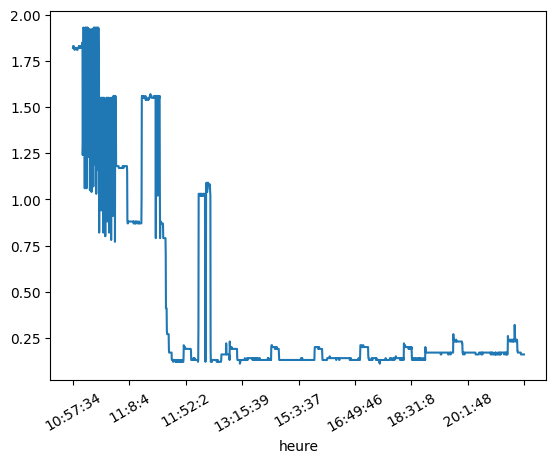

In [168]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [169]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:05:53.531427,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:06:15.389427,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:06:37.390427,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:06:59.318427,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:07:21.209427,21/08/23
...,...,...,...,...,...,...,...
1886694,21938,0.16,21.938,164.098824,46311597096,2025-02-07 21:25:28.693427,07/02/25
1886695,22189,0.16,22.189,162.242553,46311619285,2025-02-07 21:25:50.882427,07/02/25
1886696,22183,0.16,22.183,162.286436,46311641468,2025-02-07 21:26:13.065427,07/02/25
1886697,21826,0.16,21.826,164.940896,46311663294,2025-02-07 21:26:34.891427,07/02/25


In [170]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:4,26102,0.14,26.102,137.920466,46234473335,2025-02-07 00:00:04.932427,07/02/25
0:0:31,26217,0.14,26.217,137.315482,46234499552,2025-02-07 00:00:31.149427,07/02/25
0:0:55,24641,0.15,24.641,146.097967,46234524193,2025-02-07 00:00:55.790427,07/02/25
0:1:20,24755,0.14,24.755,145.425167,46234548948,2025-02-07 00:01:20.545427,07/02/25
0:1:45,25341,0.14,25.341,142.062271,46234574289,2025-02-07 00:01:45.886427,07/02/25
...,...,...,...,...,...,...,...
21:25:28,21938,0.16,21.938,164.098824,46311597096,2025-02-07 21:25:28.693427,07/02/25
21:25:50,22189,0.16,22.189,162.242553,46311619285,2025-02-07 21:25:50.882427,07/02/25
21:26:13,22183,0.16,22.183,162.286436,46311641468,2025-02-07 21:26:13.065427,07/02/25


In [171]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 22/01/25 4.785
Min : 31/01/25 2.819


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1883180,26102,0.14,26.102,137.920466,46234473335,2025-02-07 00:00:04.932427,07/02/25,0:0:4
1883181,26217,0.14,26.217,137.315482,46234499552,2025-02-07 00:00:31.149427,07/02/25,0:0:31
1883182,24641,0.15,24.641,146.097967,46234524193,2025-02-07 00:00:55.790427,07/02/25,0:0:55
1883183,24755,0.14,24.755,145.425167,46234548948,2025-02-07 00:01:20.545427,07/02/25,0:1:20
1883184,25341,0.14,25.341,142.062271,46234574289,2025-02-07 00:01:45.886427,07/02/25,0:1:45
...,...,...,...,...,...,...,...,...
1886694,21938,0.16,21.938,164.098824,46311597096,2025-02-07 21:25:28.693427,07/02/25,21:25:28
1886695,22189,0.16,22.189,162.242553,46311619285,2025-02-07 21:25:50.882427,07/02/25,21:25:50
1886696,22183,0.16,22.183,162.286436,46311641468,2025-02-07 21:26:13.065427,07/02/25,21:26:13
1886697,21826,0.16,21.826,164.940896,46311663294,2025-02-07 21:26:34.891427,07/02/25,21:26:34


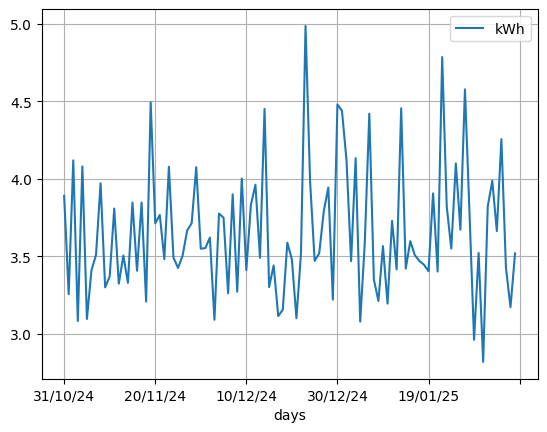

In [172]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2025-02-07 00:00:04.932427	2025-02-07 07:33:26.262427	7h 33m 21s 	1000
2025-02-07 07:33:26.262427	2025-02-07 11:44:17.628427	4h 10m 51s 	2000
2025-02-07 11:44:17.628427	2025-02-07 18:25:03.092427	6h 40m 45s 	3000
2025-02-07 18:25:03.092427	2025-02-07 21:26:57.035427	3h 1m 53s 	519
<class 'pandas.core.frame.DataFrame'>
Index: 3519 entries, 1883180 to 1886698
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3519 non-null   int64         
 1   kWh        3519 non-null   float64       
 2   sec        3519 non-null   float64       
 3   Wh         3519 non-null   float64       
 4   cumul(ms)  3519 non-null   int64         
 5   dates      3519 non-null   datetime64[ns]
 6   days       3519 non-null   object        
 7   heure      3519 non-null   object        
 8   hours      3519 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 274.9+ KB


('07/02/25', <Axes: xlabel='hours'>)

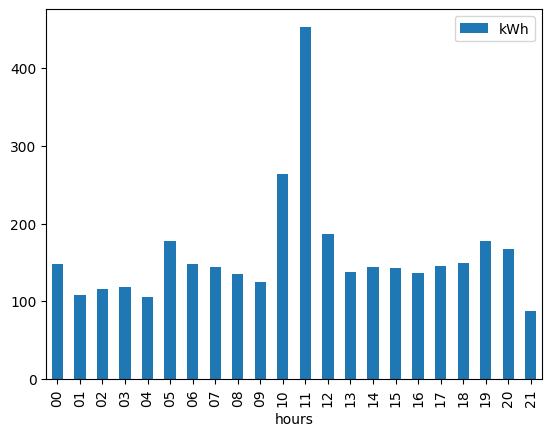

In [173]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [174]:
df_grp

,kWh
days,
21/08/23,0.574
22/08/23,3.702
23/08/23,4.234
24/08/23,3.678
25/08/23,3.967
...,...
03/02/25,3.663
04/02/25,4.256
05/02/25,3.427


In [175]:
# select number of days to display
span = 30
#df_grp.tail(span)


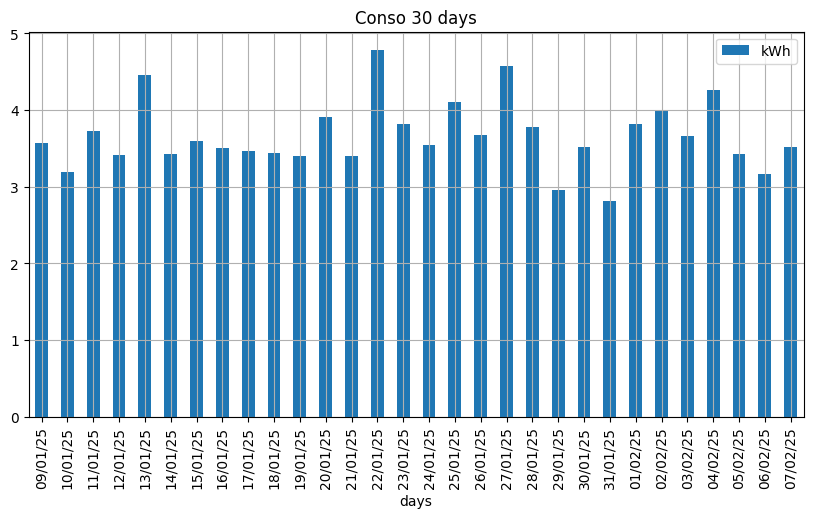

In [176]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


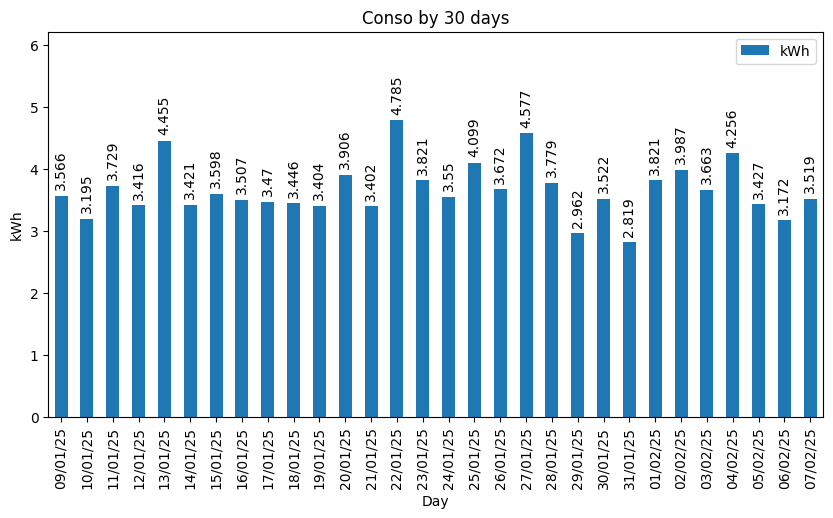

In [177]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [178]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
09/01/25    3.566
10/01/25    3.195
11/01/25    3.729
12/01/25    3.416
13/01/25    4.455
14/01/25    3.421
15/01/25    3.598
16/01/25    3.507
17/01/25    3.470
18/01/25    3.446
19/01/25    3.404
20/01/25    3.906
21/01/25    3.402
22/01/25    4.785
23/01/25    3.821
24/01/25    3.550
25/01/25    4.099
26/01/25    3.672
27/01/25    4.577
28/01/25    3.779
29/01/25    2.962
30/01/25    3.522
31/01/25    2.819
01/02/25    3.821
02/02/25    3.987
03/02/25    3.663
04/02/25    4.256
05/02/25    3.427
06/02/25    3.172
07/02/25    3.519
Name: kWh, dtype: float64

In [179]:
x_labels=df_grp.tail(span).index
x_labels

Index(['09/01/25', '10/01/25', '11/01/25', '12/01/25', '13/01/25', '14/01/25',
       '15/01/25', '16/01/25', '17/01/25', '18/01/25', '19/01/25', '20/01/25',
       '21/01/25', '22/01/25', '23/01/25', '24/01/25', '25/01/25', '26/01/25',
       '27/01/25', '28/01/25', '29/01/25', '30/01/25', '31/01/25', '01/02/25',
       '02/02/25', '03/02/25', '04/02/25', '05/02/25', '06/02/25', '07/02/25'],
      dtype='object', name='days')

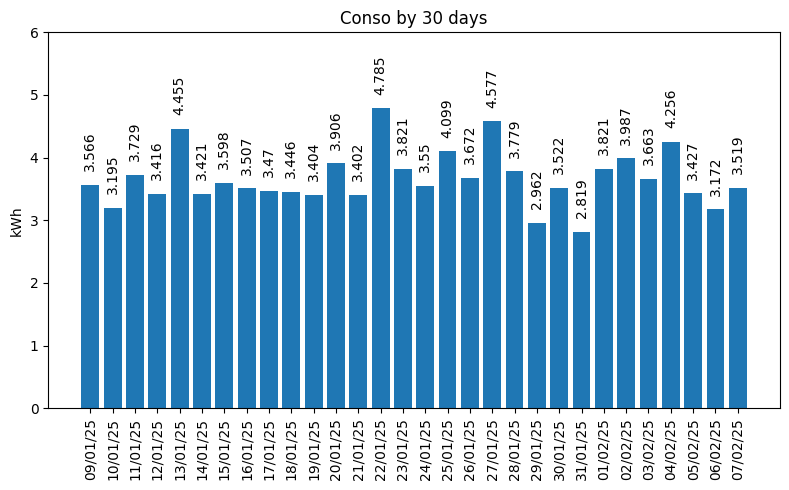

In [180]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [181]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

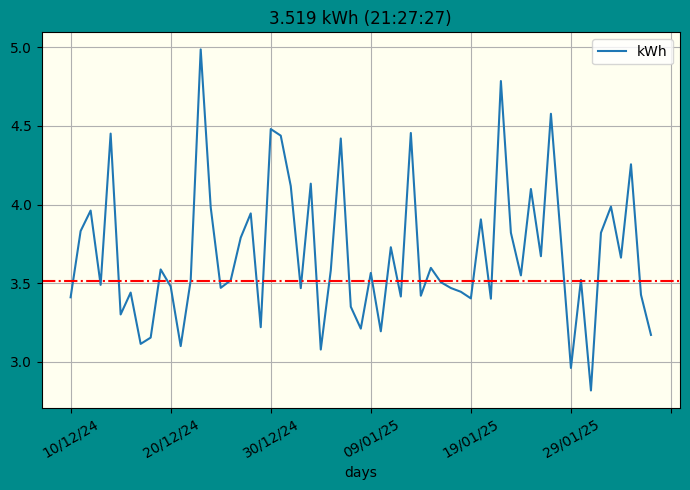

In [182]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

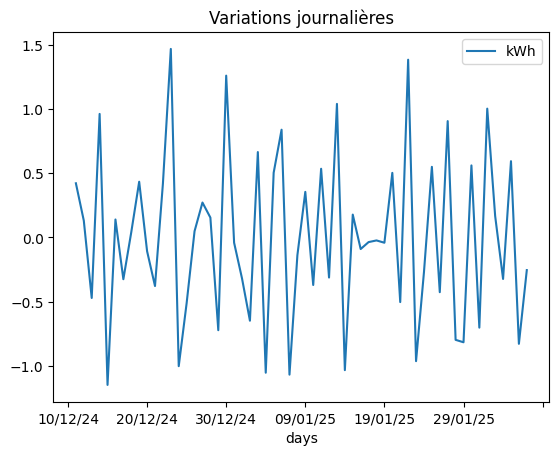

In [183]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [184]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:05:53.531427,21/08/23,21
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:06:15.389427,21/08/23,21
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:06:37.390427,21/08/23,21
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:06:59.318427,21/08/23,21
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:07:21.209427,21/08/23,21
...,...,...,...,...,...,...,...,...
1886694,21938,0.16,21.938,164.098824,46311597096,2025-02-07 21:25:28.693427,07/02/25,21
1886695,22189,0.16,22.189,162.242553,46311619285,2025-02-07 21:25:50.882427,07/02/25,21
1886696,22183,0.16,22.183,162.286436,46311641468,2025-02-07 21:26:13.065427,07/02/25,21
1886697,21826,0.16,21.826,164.940896,46311663294,2025-02-07 21:26:34.891427,07/02/25,21


In [185]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [186]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [187]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [188]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,574
22/08/23,3702
23/08/23,4234
24/08/23,3678
25/08/23,3967
...,...
03/02/25,3663
04/02/25,4256
05/02/25,3427


In [190]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 21:05:53.531427,21/08/23,21
1,21858,0.16,21.858,164.699424,43792,2023-08-21 21:06:15.389427,21/08/23,21
2,22001,0.16,22.001,163.628926,65793,2023-08-21 21:06:37.390427,21/08/23,21
3,21928,0.16,21.928,164.173659,87721,2023-08-21 21:06:59.318427,21/08/23,21
4,21891,0.16,21.891,164.451144,109612,2023-08-21 21:07:21.209427,21/08/23,21
...,...,...,...,...,...,...,...,...
1886694,21938,0.16,21.938,164.098824,46311597096,2025-02-07 21:25:28.693427,07/02/25,21
1886695,22189,0.16,22.189,162.242553,46311619285,2025-02-07 21:25:50.882427,07/02/25,21
1886696,22183,0.16,22.183,162.286436,46311641468,2025-02-07 21:26:13.065427,07/02/25,21
1886697,21826,0.16,21.826,164.940896,46311663294,2025-02-07 21:26:34.891427,07/02/25,21


In [191]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 21    0        21/08/23    21  0.16
               1        21/08/23    21  0.16
               2        21/08/23    21  0.16
               3        21/08/23    21  0.16
               4        21/08/23    21  0.16
...                          ...   ...   ...
07/02/25 21    1886694  07/02/25    21  0.16
               1886695  07/02/25    21  0.16
               1886696  07/02/25    21  0.16
               1886697  07/02/25    21  0.16
               1886698  07/02/25    21  0.16

[1886699 rows x 3 columns]

In [192]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [193]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/23', '17'), ('23/08/23', '18'), ('23/08/2

In [194]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,574,574
22/08/23,3702,3702
23/08/23,4234,4234
24/08/23,3678,3678
25/08/23,3967,3967
...,...,...
03/02/25,3663,3663
04/02/25,4256,4256
05/02/25,3427,3427


In [195]:
grp_by_day['kWh'].cumsum()

days
21/08/23        574
22/08/23       4276
23/08/23       8510
24/08/23      12188
25/08/23      16155
             ...   
03/02/25    1872325
04/02/25    1876581
05/02/25    1880008
06/02/25    1883180
07/02/25    1886699
Name: kWh, Length: 537, dtype: int64

In [196]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 21     160
         22     284
         23     130
22/08/23 00     130
         01     130
...             ...
07/02/25 17     145
         18     149
         19     178
         20     167
         21      88

[12865 rows x 1 columns]

In [197]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  21           160
          22           444
          23           574
22/08/23  00           704
          01           834
                    ...   
07/02/25  17       1886117
          18       1886266
          19       1886444
          20       1886611
          21       1886699
Name: kWh, Length: 12865, dtype: int64

In [198]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 21     160     160    NaN
         22     284     444  124.0
         23     130     574 -154.0
22/08/23 00     130     130    NaN
         01     130     260    0.0
...             ...     ...    ...
07/02/25 17     145    2937    8.0
         18     149    3086    4.0
         19     178    3264   29.0
         20     167    3431  -11.0
         21      88    3519  -79.0

[12865 rows x 3 columns]

In [199]:
today, grp_by_dayhours.loc[today]

('07/02/25',
        kWh  cumsum   diff
 hours                    
 00     148     148    NaN
 01     108     256  -40.0
 02     116     372    8.0
 03     119     491    3.0
 04     106     597  -13.0
 05     178     775   72.0
 06     148     923  -30.0
 07     144    1067   -4.0
 08     135    1202   -9.0
 09     125    1327  -10.0
 10     264    1591  139.0
 11     453    2044  189.0
 12     186    2230 -267.0
 13     138    2368  -48.0
 14     144    2512    6.0
 15     143    2655   -1.0
 16     137    2792   -6.0
 17     145    2937    8.0
 18     149    3086    4.0
 19     178    3264   29.0
 20     167    3431  -11.0
 21      88    3519  -79.0)

Text(0.5, 1.0, 'Cumul journalier')

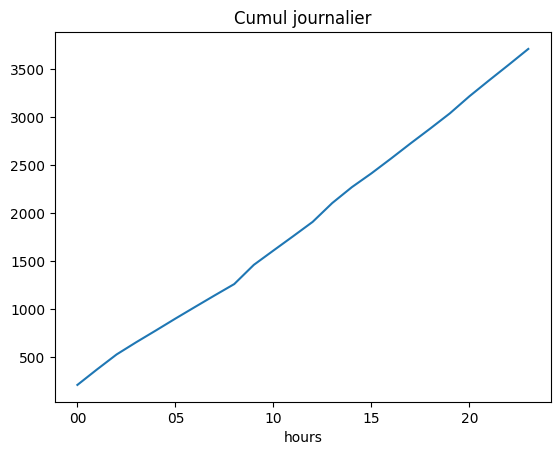

In [200]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

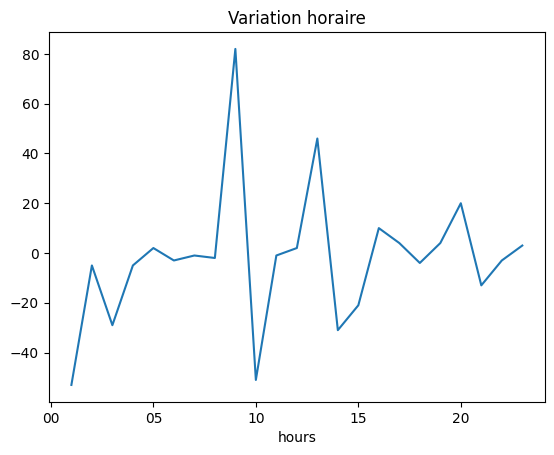

In [201]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [202]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

537

In [203]:
df_grp.tail(n)['kWh'].describe()


count    537.000000
mean       3.513406
std        0.672853
min        0.574000
25%        3.351000
50%        3.617000
75%        3.874000
max        5.062000
Name: kWh, dtype: float64

In [204]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '537 days')

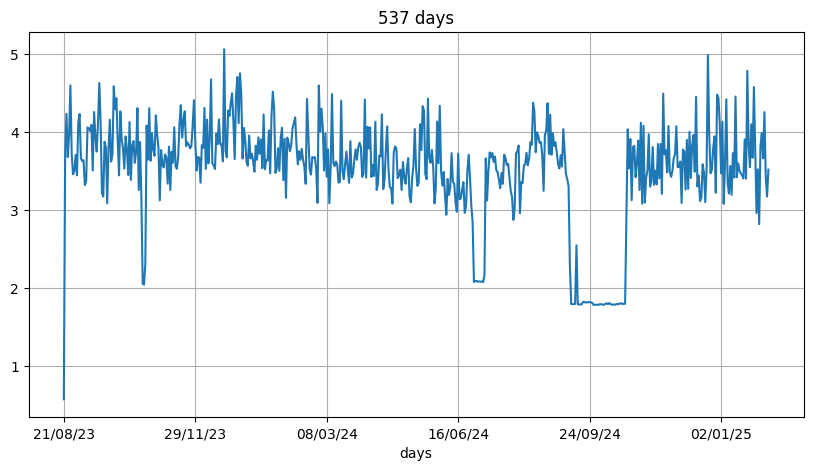

In [205]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '400 days')

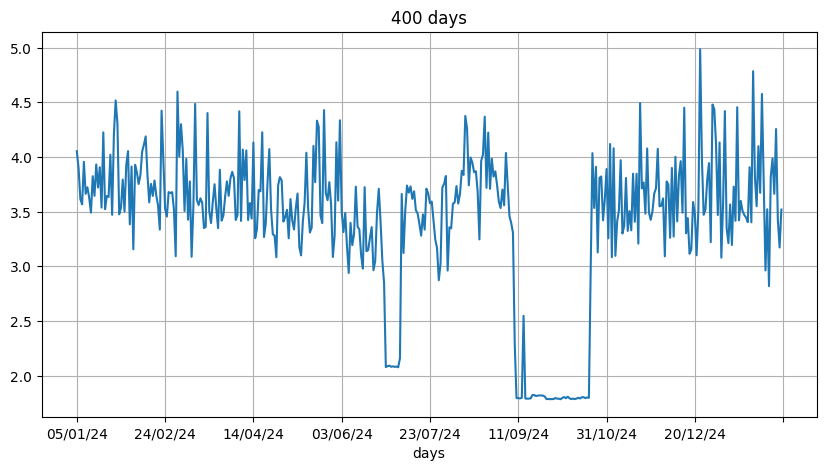

In [206]:
# show conso in span 
span = 400
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [207]:
df_grp['kWh']

days
21/08/23    0.574
22/08/23    3.702
23/08/23    4.234
24/08/23    3.678
25/08/23    3.967
            ...  
03/02/25    3.663
04/02/25    4.256
05/02/25    3.427
06/02/25    3.172
07/02/25    3.519
Name: kWh, Length: 537, dtype: float64

In [208]:
df_grp.describe()

,kWh
count,537.000000
mean,3.513406
std,0.672853
min,0.574000
25%,3.351000
50%,3.617000
75%,3.874000
max,5.062000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

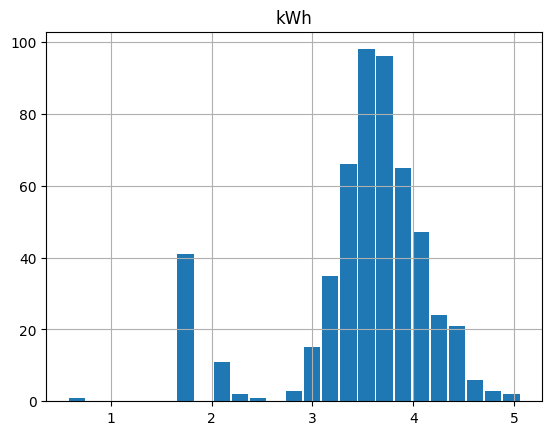

In [209]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [210]:
df_grp.tail(span)['kWh']

days
05/01/24    4.053
06/01/24    3.896
07/01/24    3.615
08/01/24    3.567
09/01/24    3.956
            ...  
03/02/25    3.663
04/02/25    4.256
05/02/25    3.427
06/02/25    3.172
07/02/25    3.519
Name: kWh, Length: 400, dtype: float64

# Conso par heure

In [211]:
day

'07/02/25'

In [212]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,148,148,NaN
01,108,256,-40.0
02,116,372,8.0
03,119,491,3.0
04,106,597,-13.0
05,178,775,72.0
06,148,923,-30.0
07,144,1067,-4.0
08,135,1202,-9.0


In [213]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


22

In [214]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 23)

In [215]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [216]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22.])

In [217]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
Name: days, dtype: float64

In [218]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [219]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 00 to 21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     22 non-null     int64  
 1   cumsum  22 non-null     int64  
 2   diff    21 non-null     float64
 3   days    22 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 880.0+ bytes


In [220]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
21    22.0
Name: days, dtype: float64

In [221]:
day

'07/02/25'

In [222]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,148,148,NaN,1.0
01,108,256,-40.0,2.0
02,116,372,8.0,3.0
03,119,491,3.0,4.0
04,106,597,-13.0,5.0
05,178,775,72.0,6.0
06,148,923,-30.0,7.0
07,144,1067,-4.0,8.0
08,135,1202,-9.0,9.0


Text(0.5, 1.0, '07/02/25')

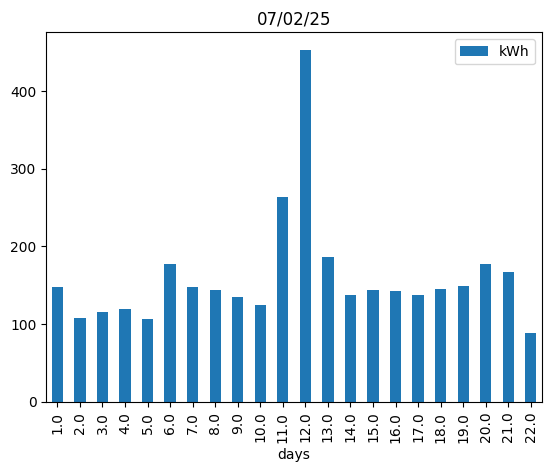

In [223]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [224]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object', name='hours')

# Conso du jour


In [225]:
groupedbyhour.count()

,kWh
hours,
00,148
01,108
02,116
03,119
04,106
05,178
06,148
07,144
08,135


In [226]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    164
01    152
02    167
03    151
04    169
05    166
06    146
07    137
08    118
09    127
10    131
11    114
12    130
13    125
14    175
15    156
16    138
17    157
18    986
19    228
20    291
21    292
22    317
23    325
Name: kWh, dtype: int64

In [227]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

365.532

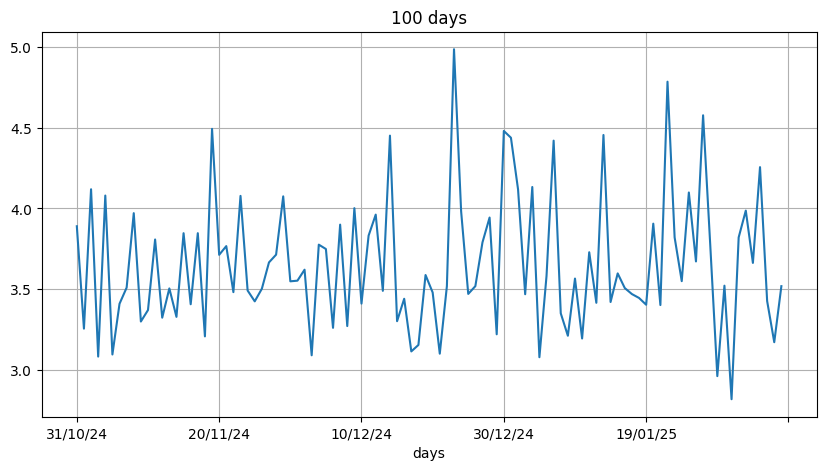

In [228]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [229]:
df_grp.tail(1)

,kWh
days,
07/02/25,3.519


In [230]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

3.519

In [231]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

85.84874534606934


# Today

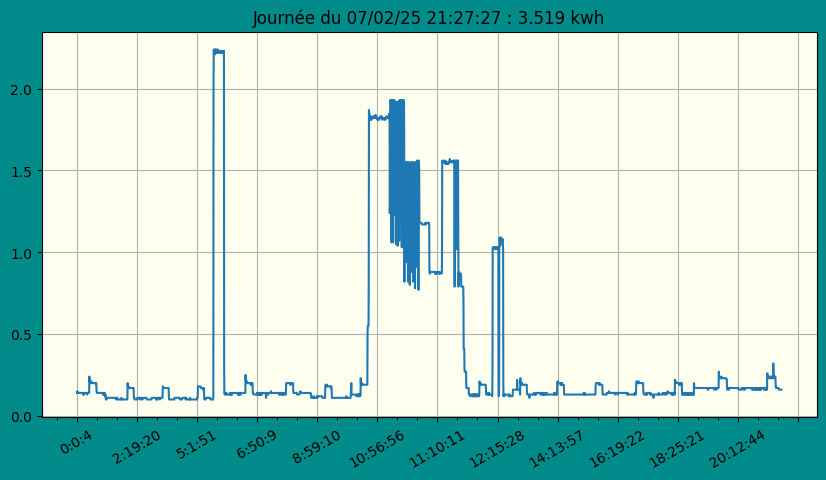

In [232]:
show(today,bgcolor='ivory')

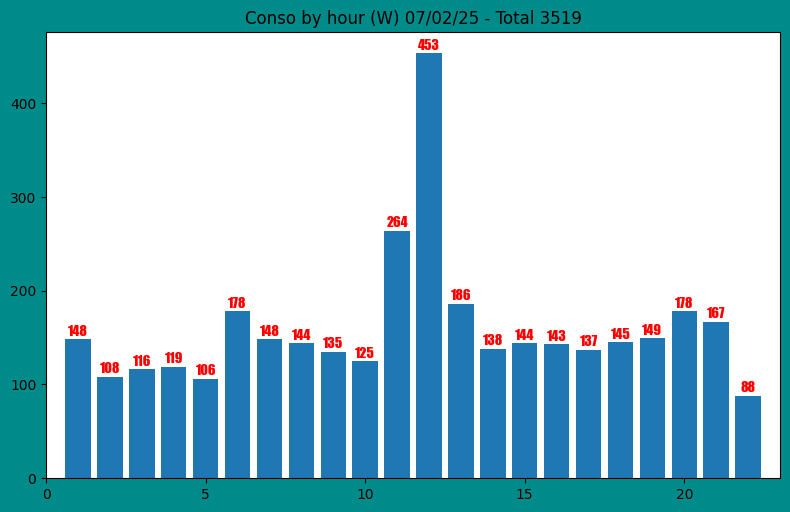

In [233]:
conso_by_hour(today)

In [234]:
day = '16/01/25'

('16/01/25', None)

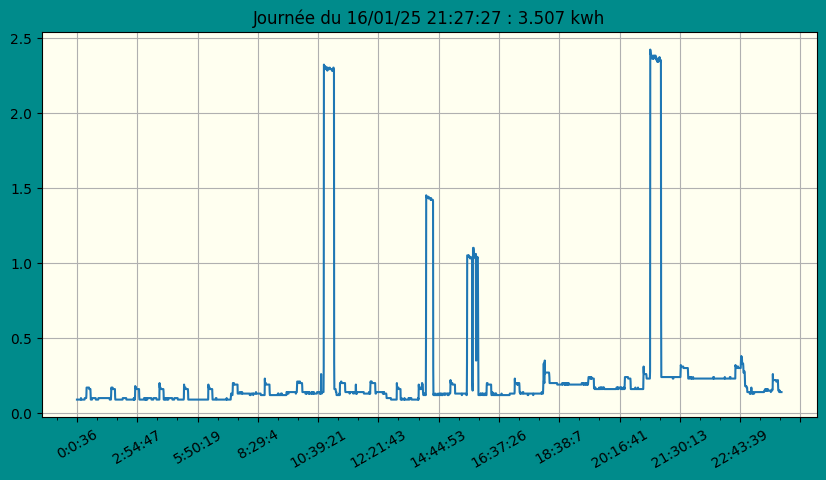

In [235]:
day, show(day,bgcolor='ivory')

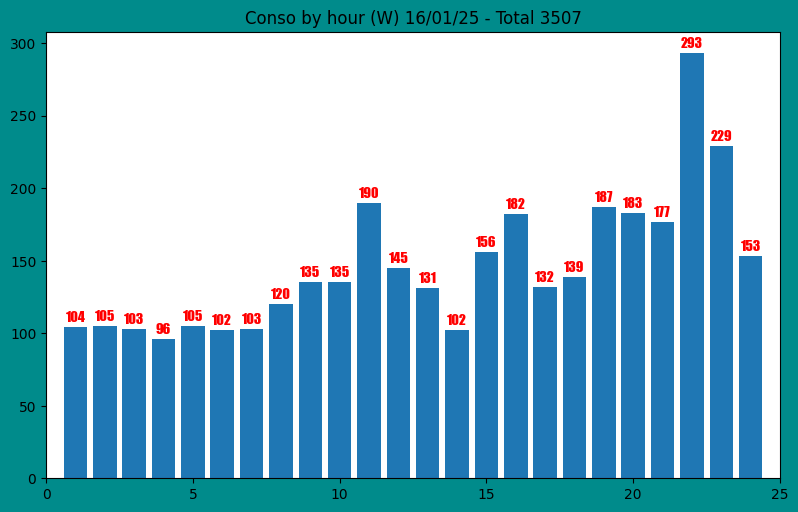

In [236]:
conso_by_hour(day)

In [237]:
maxday

'21/12/23'

('21/12/23', None)

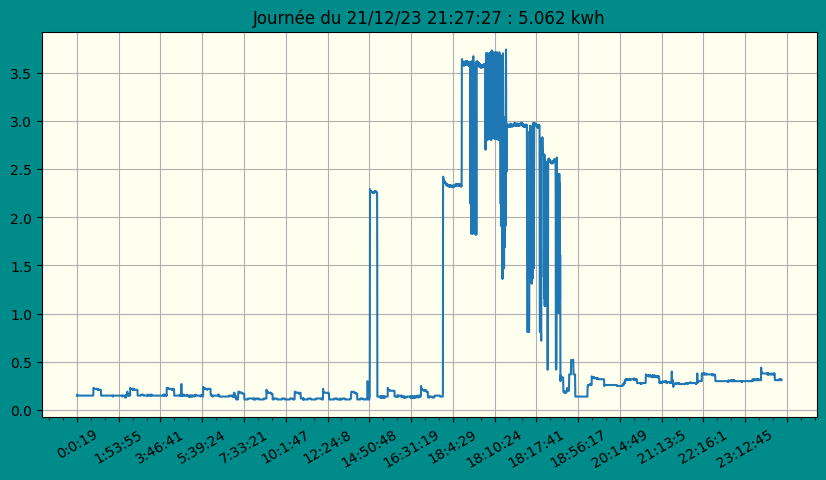

In [238]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

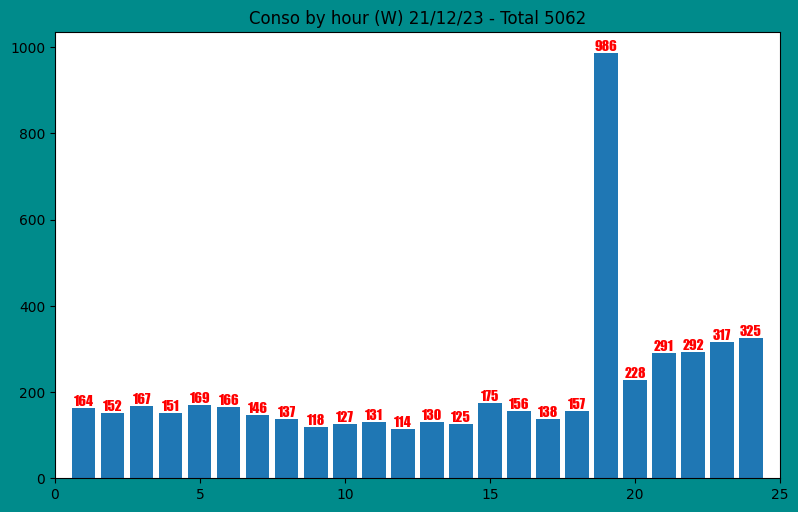

In [239]:
conso_by_hour(day)

In [240]:
sum(data)

5062

In [241]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,148,148,NaN,1.0
01,108,256,-40.0,2.0
02,116,372,8.0,3.0
03,119,491,3.0,4.0
04,106,597,-13.0,5.0
05,178,775,72.0,6.0
06,148,923,-30.0,7.0
07,144,1067,-4.0,8.0
08,135,1202,-9.0,9.0


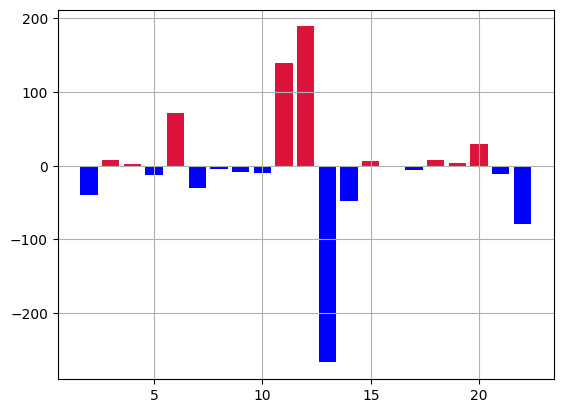

In [242]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [243]:
data

hours
00    164
01    152
02    167
03    151
04    169
05    166
06    146
07    137
08    118
09    127
10    131
11    114
12    130
13    125
14    175
15    156
16    138
17    157
18    986
19    228
20    291
21    292
22    317
23    325
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

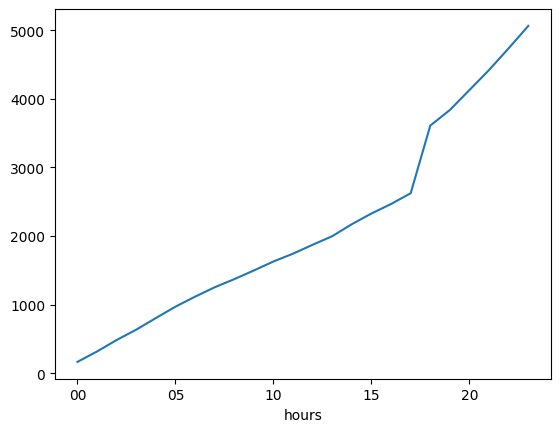

In [244]:
data.cumsum().plot()


<Axes: xlabel='hours'>

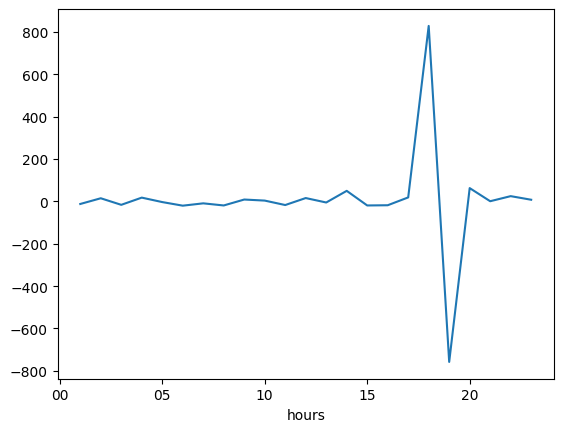

In [245]:
# evolution par heure
data.diff().plot()

In [246]:
data.diff().describe()

count     23.000000
mean       7.000000
std      240.392671
min     -758.000000
25%      -16.500000
50%        1.000000
75%       17.000000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

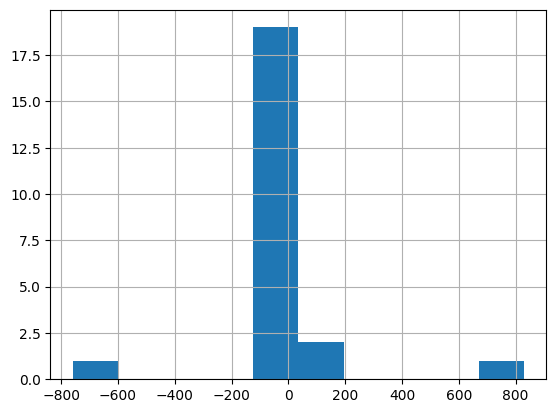

In [247]:
data.diff().hist()

# Test sauvegarde

In [248]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.git_old',
 '.ipynb_checkpoints',
 '1row.flf',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich5_test.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'amlich_soc_tiet.ipynb',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite

In [249]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [250]:
#conso_byhour(day)

In [251]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


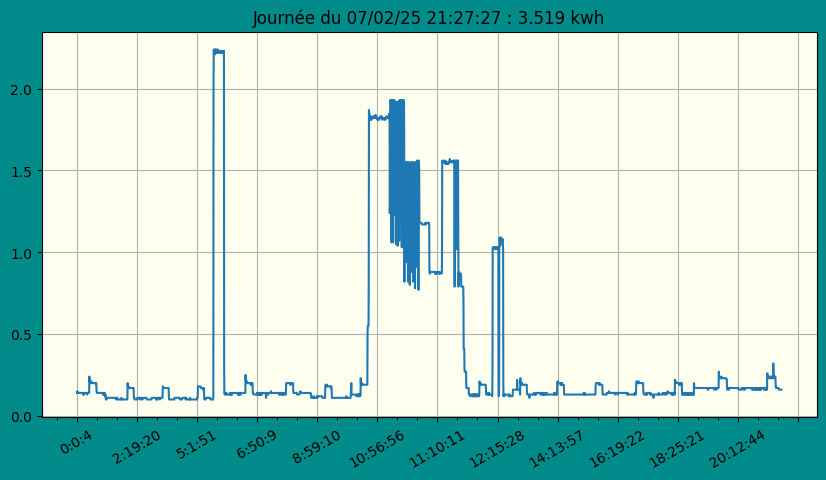

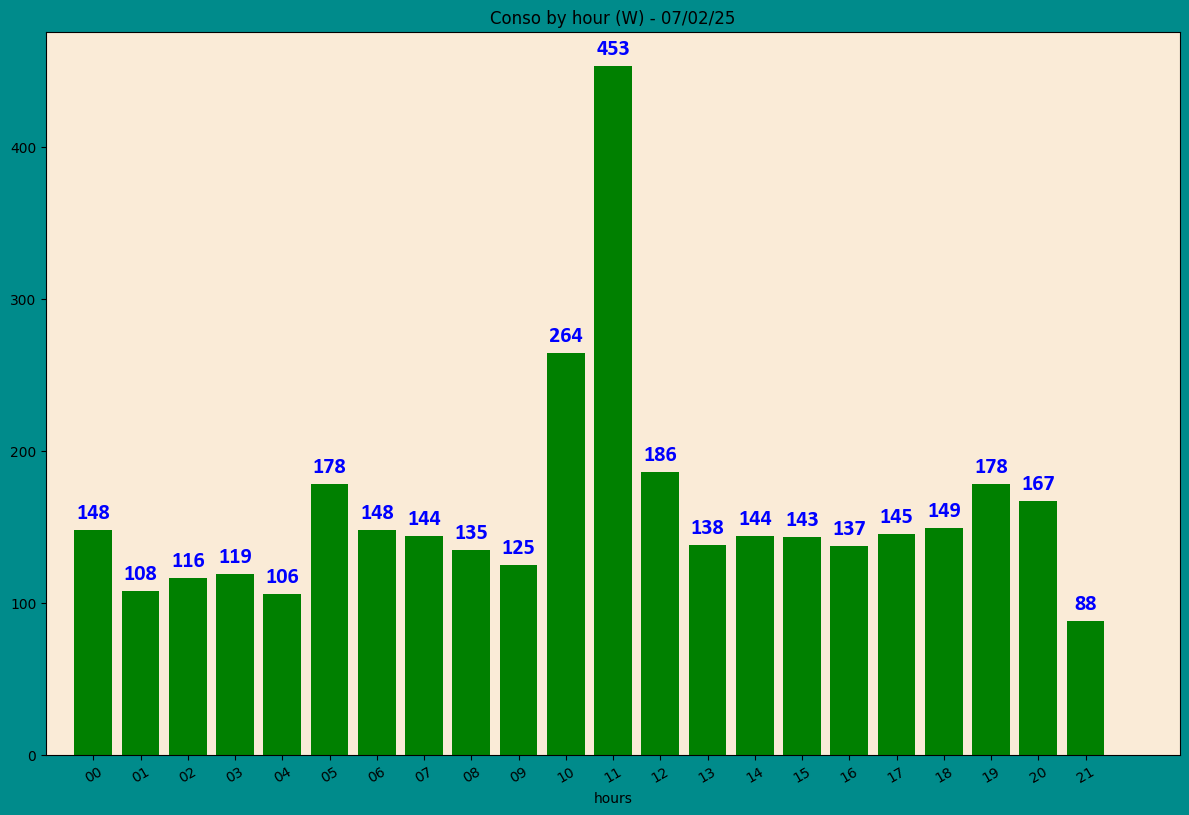

In [252]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [253]:
month.describe()


count    30.000000
mean      3.654633
std       0.448204
min       2.819000
25%       3.417250
50%       3.558000
75%       3.821000
max       4.785000
Name: kWh, dtype: float64

<Axes: >

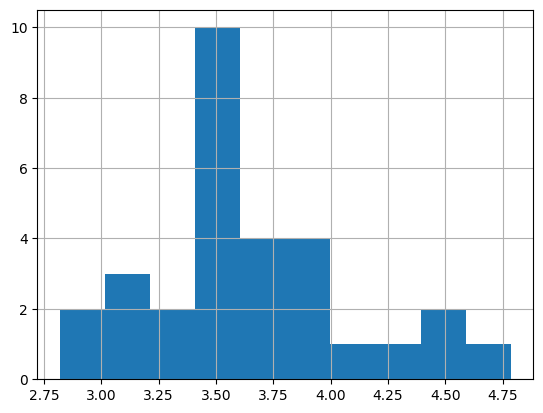

In [254]:
month.hist()

<Axes: xlabel='days'>

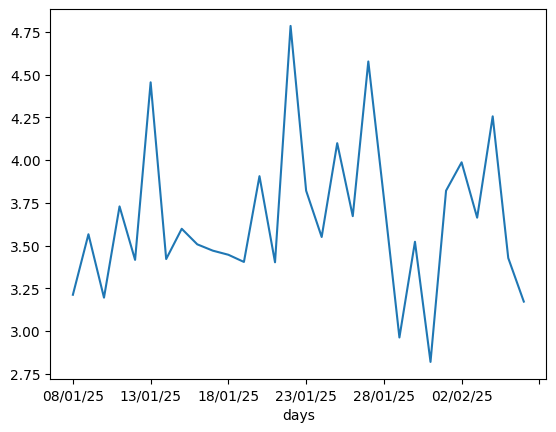

In [255]:
month.plot()

In [256]:
# date with max conso in 1 month
month.idxmax()

'22/01/25'

In [257]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'22/01/25'

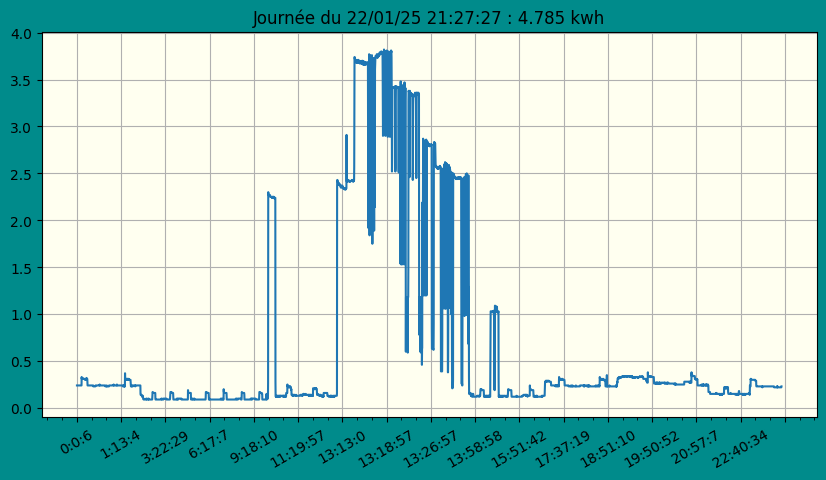

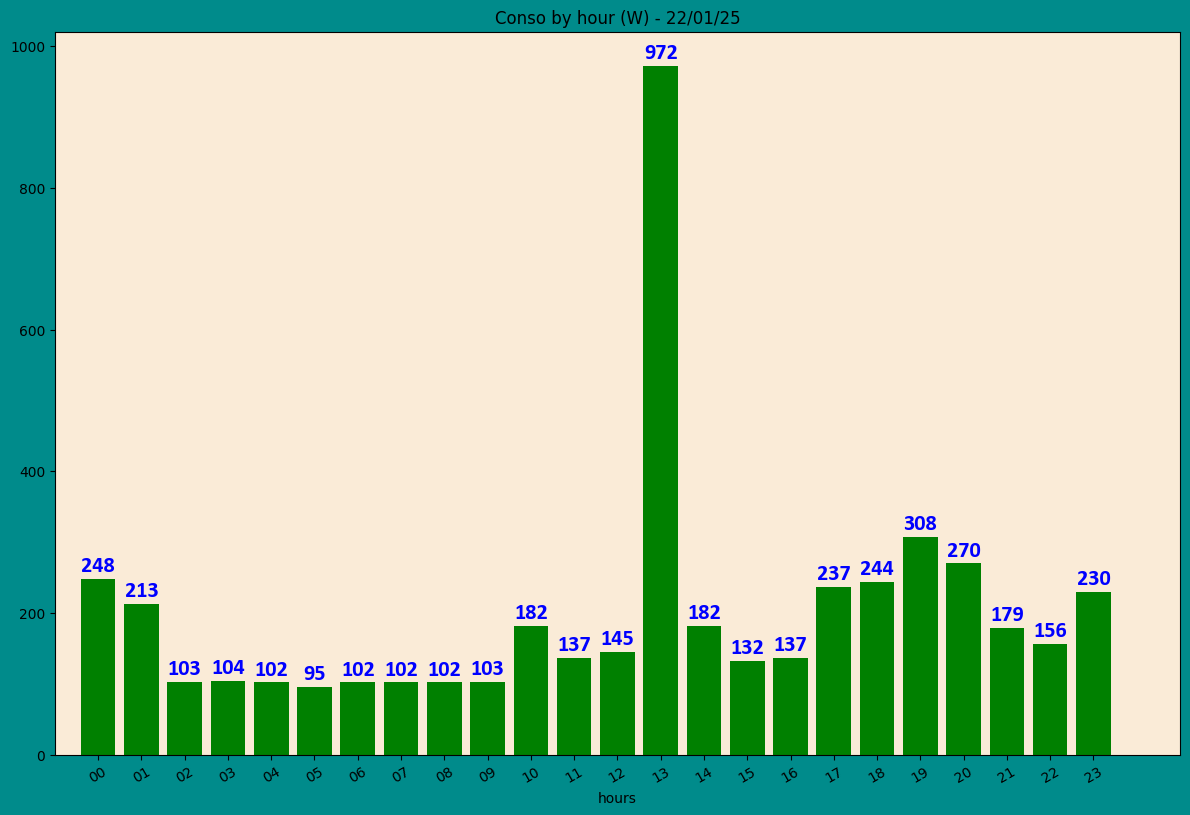

In [258]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [259]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 21     160     160    NaN   NaN
         22     284     444  124.0   NaN
         23     130     574 -154.0   NaN
22/08/23 00     130     130    NaN   NaN
         01     130     260    0.0   NaN
...             ...     ...    ...   ...
07/02/25 17     145    2937    8.0  18.0
         18     149    3086    4.0  19.0
         19     178    3264   29.0  20.0
         20     167    3431  -11.0  21.0
         21      88    3519  -79.0  22.0

[12865 rows x 4 columns]

In [260]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,248,248,NaN,NaN
01,213,461,-35.0,NaN
02,103,564,-110.0,NaN
03,104,668,1.0,NaN
04,102,770,-2.0,NaN
05,95,865,-7.0,NaN
06,102,967,7.0,NaN
07,102,1069,0.0,NaN
08,102,1171,0.0,NaN


In [261]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

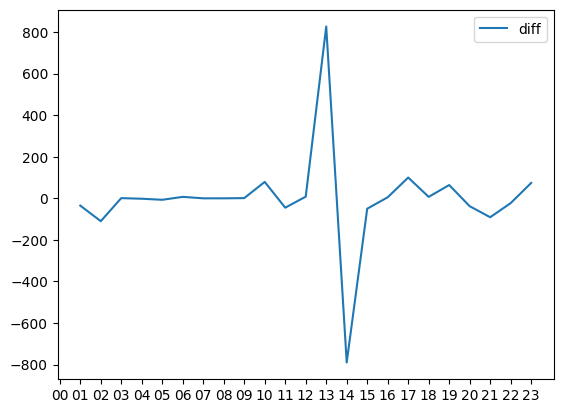

In [262]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

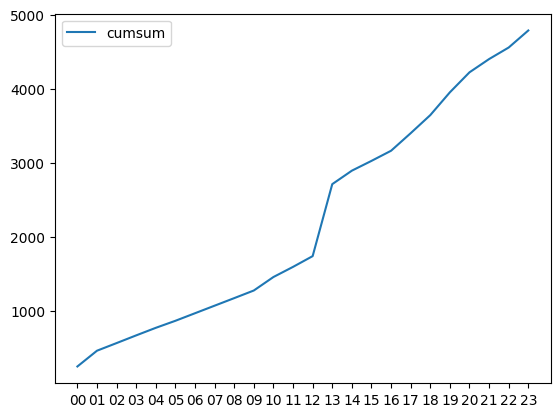

In [263]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [264]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB